## Neural Network

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy import optimize
import itertools
import math

In [18]:
X = np.loadtxt('xy/x.csv', delimiter=',')
Y = np.loadtxt('xy/y.csv', delimiter=',')
T1 = np.loadtxt('theta/theta1.csv', delimiter=',')
T2 = np.loadtxt('theta/theta2.csv', delimiter=',')

In [3]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

In [4]:
def precision(res, y):
    contador = 0
    for i in range(res.shape[0]) :
        if (res[i] == Y[i]):
            contador +=1
    
    return (contador*100.0)/res.shape[0]

In [5]:
def init_weight(input_layer, hidden_layer, out_layer):
    w1 = np.random.randn(hidden_layer, input_layer) 
    w2 = np.random.randn(out_layer, hidden_layer )
    #w1 = T1
    #w2 = T2
    return w1,w2

In [6]:
#vectorizando Y
def create_Y(y, out_size, m):
    yn = np.zeros((m, out_size))
    for i in range(m):
        yn[i][int(y[i])%10] = 1
    return yn

In [7]:
def compute_cost(a3, Y):
    m = Y.shape[0] # 5000
    temp = np.sum(Y * np.log(a3) + (1 - Y) * (np.log(1 - a3)), axis=1)
    cost = (-1/m) * np.sum(temp, axis=0)
    return cost

In [8]:
def gradiente_prima(z):
    gz = sigmoid(z)
    return gz * (1-gz);

In [16]:
def matrix_conf(y_, y_pre, val):
    matrix = np.zeros((val,val))
    for i in range(y_pre.shape[0]):
        k = int(y_[i]-1) #valores reales
        l = int(y_pre[i]-1) #valores predichos
        matrix[l][k] += 1
    return matrix

### Forward

In [10]:
def forward(x, t1, t2):
    #capa1
    a1 = np.c_[np.ones((x.shape[0],1)),X] 
    #capa2
    z2 = np.dot(a1, t1.T)
    a2= sigmoid(z2)
    #capa3
    z3 = np.dot(a2,t2.T) 
    a3 = sigmoid(z3)
    
    result={'a1': a1, 'a2':a2, 'a3':a3, 'z2':z2, 'z3':z3}    
    return result

### Compute Gradiente

In [11]:
def compute_gradient_reg(ford,t2, y_vec , m):
    a1 = ford['a1']
    a2 = ford['a2']
    a3 = ford['a3']
    z2 = ford['z2']
    z3 = ford['z3']
        
    d3 = a3 - y_vec 
    d2 = np.dot(d3,t2) * gradiente_prima(z2)

    delta1 = np.dot(d2.T,a1)
    delta2 = np.dot(d3.T,a2) 
    
    grad1 = delta1/m
    grad2 = delta2/m
        
    return grad1,grad2

In [12]:
def session(x, y, hidden_layer, iterations):
    input_layer = x.shape[1]+1
    out_layer = y.shape[1] 
    m = x.shape[0]
    rate = 1.5
    
    w1,w2 = init_weight(input_layer, hidden_layer, out_layer)
    
    for i in range(iterations):
        ford = forward(x, w1, w2)
        cost = compute_cost(ford['a3'], y) 
        grad1,grad2 = compute_gradient_reg(ford, w2, y,m) #backward
        
        w1 = w1 - rate * grad1
        w2 = w2 - rate * grad2
        
        if i % 100 == 0:
            print (i," iteracion con costo: ",cost)

    return w1,w2

In [13]:
Y_vec = create_Y(Y, 10, X.shape[0])
W1,W2 = session(X, Y_vec, 25,3001)

0  iteracion con costo:  24.106996982617062
100  iteracion con costo:  1.4205365132950785
200  iteracion con costo:  1.0199516598974154
300  iteracion con costo:  0.811649340716185
400  iteracion con costo:  0.6914077175370696
500  iteracion con costo:  0.6084495445040334
600  iteracion con costo:  0.5463257327898332
700  iteracion con costo:  0.4985191038594805
800  iteracion con costo:  0.45992090740811964
900  iteracion con costo:  0.42725695724444995
1000  iteracion con costo:  0.3990645631642238
1100  iteracion con costo:  0.3746591296329841
1200  iteracion con costo:  0.3533460477176852
1300  iteracion con costo:  0.33450551771576403
1400  iteracion con costo:  0.3178035026197646
1500  iteracion con costo:  0.3028124780467985
1600  iteracion con costo:  0.2892741184079865
1700  iteracion con costo:  0.2769777746257005
1800  iteracion con costo:  0.2656925743343927
1900  iteracion con costo:  0.2552098618631222
2000  iteracion con costo:  0.24537319675215763
2100  iteracion con co

In [14]:
ford = forward(X, W1, W2)
out = ford['a3']

In [17]:
Y_pre = np.argmax(out,axis=1).T 
matrix_conf(Y,Y_pre,10)

array([[494.,   0.,   1.,   0.,   1.,   0.,   3.,   2.,   0.,   0.],
       [  1., 490.,   5.,   1.,   1.,   1.,   1.,   1.,   0.,   0.],
       [  2.,   2., 484.,   0.,   2.,   0.,   1.,   1.,   5.,   0.],
       [  0.,   2.,   1., 494.,   0.,   0.,   1.,   2.,   3.,   0.],
       [  0.,   0.,   1.,   0., 494.,   4.,   0.,   0.,   0.,   1.],
       [  0.,   1.,   1.,   0.,   1., 492.,   0.,   2.,   0.,   3.],
       [  0.,   1.,   2.,   0.,   0.,   0., 494.,   0.,   1.,   0.],
       [  2.,   3.,   4.,   0.,   0.,   1.,   0., 491.,   1.,   0.],
       [  1.,   0.,   1.,   4.,   1.,   0.,   0.,   0., 487.,   0.],
       [  0.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,   3., 496.]])

In [18]:
precision(Y_pre,Y)

88.4

### Matrix Confusion

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('Valores Calculados')
    mpl.xlabel('Valores Reales')

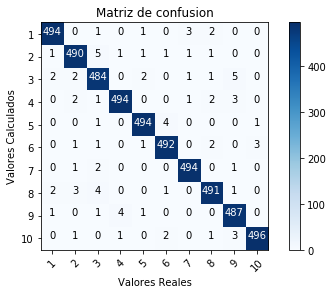

In [20]:
mat = np.zeros((10,10),dtype=int)
result = np.argmax(out,axis=1).T #prediccion
def conf_matr():
    for i in range(len(result)):
        k = int(Y[i]-1) #valores reales
        l = int(result[i]-1) #valores predicho
        mat[l][k] += 1        
    names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
    mpl.figure()
    plot_confusion_matrix(mat, classes=names,
                          title='Matriz de confusion')
    
  #  mpl.figure()
  #  plot_confusion_matrix(mat, classes=names, normalize=True,
                          #title='Matriz de confusion normalizada')
    
conf_matr()

In [21]:
fn=500
rpta=np.zeros((10,3))
fp = np.sum(mat, axis=1)

for i in range(10):
    rpta[i,0]= mat[i][i]/fp[i]
    rpta[i,1]= mat[i][i]/fn
    rpta[i,2]= 2*(rpta[i,0]*rpta[i,1])/(rpta[i,0]+rpta[i,1])
    
    
data = pd.DataFrame(rpta,columns=['Precision','Recall','F1 score'],index=['1','2','3','4','5','6','7','8','9','10'])
print (data)


    Precision  Recall  F1 score
1    0.986028   0.988  0.987013
2    0.978044   0.980  0.979021
3    0.973843   0.968  0.970913
4    0.982107   0.988  0.985045
5    0.988000   0.988  0.988000
6    0.984000   0.984  0.984000
7    0.991968   0.988  0.989980
8    0.978088   0.982  0.980040
9    0.985830   0.974  0.979879
10   0.984127   0.992  0.988048


### SVC

In [22]:
from sklearn.svm import SVC

In [41]:
# C = 1
clf = SVC(gamma = 0.1)
clf.fit(X, Y.T)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
print(clf.predict)

<bound method BaseSVC.predict of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>


In [30]:
sk_predic =clf.predict(X)

In [28]:
clf.score(X,Y.T)

0.9212

In [31]:
matrix_conf(Y,sk_predic,10)

array([[493.,  11.,   7.,   2.,   5.,   4.,  13.,  13.,   4.,   0.],
       [  1., 442.,   8.,   5.,   2.,   1.,   5.,  11.,   2.,   2.],
       [  0.,   3., 440.,   0.,  16.,   0.,   0.,  10.,   6.,   3.],
       [  0.,   9.,   1., 470.,   5.,   7.,  11.,   2.,   9.,   1.],
       [  5.,   2.,  25.,   1., 458.,   7.,   0.,  18.,   3.,   5.],
       [  0.,   6.,   1.,   3.,   7., 478.,   0.,   8.,   1.,   2.],
       [  1.,   5.,   7.,   0.,   0.,   0., 458.,   1.,  15.,   2.],
       [  0.,  13.,   6.,   0.,   5.,   0.,   0., 429.,   0.,   2.],
       [  0.,   1.,   4.,  19.,   1.,   0.,  12.,   8., 455.,   0.],
       [  0.,   8.,   1.,   0.,   1.,   3.,   1.,   0.,   5., 483.]])

In [44]:
# Saco C y gamma con mayor score
def take_best_score(x, y, valores): 
    scores = []
    best_c = []
    best_g = []       
    for i in range(len(valores)): #C
        for j in range(len(valores)): #gamma
            clf = SVC(C = valores[i], gamma = valores[j]).fit(x , y) #train
            sc  = clf.score(x, y) 
            print("Mi C=",valores[i]," mi gamma=",valores[j]," SCORE ",sc)
            best_c.append(valores[i])
            best_g.append(valores[j])
            scores.append(sc)
                  
    return scores, best_c, best_g        

In [45]:
scores = take_best_score(X,Y,[0.1,0.3,0.7,1.0,5.0,20.0])

Mi C= 0.1  mi gamma= 0.1  SCORE  0.9268
Mi C= 0.1  mi gamma= 0.3  SCORE  0.6532
Mi C= 0.1  mi gamma= 0.7  SCORE  0.9322
Mi C= 0.1  mi gamma= 1.0  SCORE  0.9318
Mi C= 0.1  mi gamma= 5.0  SCORE  1.0
Mi C= 0.1  mi gamma= 20.0  SCORE  1.0
Mi C= 0.3  mi gamma= 0.1  SCORE  0.9816
Mi C= 0.3  mi gamma= 0.3  SCORE  0.7312
Mi C= 0.3  mi gamma= 0.7  SCORE  0.9758
Mi C= 0.3  mi gamma= 1.0  SCORE  0.9562
Mi C= 0.3  mi gamma= 5.0  SCORE  1.0
Mi C= 0.3  mi gamma= 20.0  SCORE  1.0
Mi C= 0.7  mi gamma= 0.1  SCORE  0.9958
Mi C= 0.7  mi gamma= 0.3  SCORE  0.998
Mi C= 0.7  mi gamma= 0.7  SCORE  1.0
Mi C= 0.7  mi gamma= 1.0  SCORE  1.0
Mi C= 0.7  mi gamma= 5.0  SCORE  1.0
Mi C= 0.7  mi gamma= 20.0  SCORE  1.0
Mi C= 1.0  mi gamma= 0.1  SCORE  0.9984
Mi C= 1.0  mi gamma= 0.3  SCORE  1.0
Mi C= 1.0  mi gamma= 0.7  SCORE  1.0
Mi C= 1.0  mi gamma= 1.0  SCORE  1.0
Mi C= 1.0  mi gamma= 5.0  SCORE  1.0
Mi C= 1.0  mi gamma= 20.0  SCORE  1.0
Mi C= 5.0  mi gamma= 0.1  SCORE  1.0
Mi C= 5.0  mi gamma= 0.3  SCORE  1.0
Mi

### K-means

In [16]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [37]:
result = kmeans.labels_
result

array([4, 4, 6, ..., 0, 2, 0], dtype=int32)

In [38]:
result.shape

(5000,)

In [31]:
#kmeans.predict(X[1])

## CRF conditional random fit...

In [11]:
mat = np.array ([[0.4,0.3,0.3],[0.2,0.4,0.4],[0.3,0.5,0.2]])
xi = np.array([0.1,0.4,0.5])
print(mat)
mult = np.dot(xi,mat)
print(mult)
mult1= np.dot(mat,mult)
print(mult1)

[[0.4 0.3 0.3]
 [0.2 0.4 0.4]
 [0.3 0.5 0.2]]
[0.27 0.44 0.29]
[0.327 0.346 0.359]


In [14]:
#cadenas de marcov
mat = [[0.4,0.3,0.3],[0.2,0.4,0.4],[0.3,0.5,0.2]]
xi = [0.1,0.4,0.5]

for i in range(10):
    mul= np.dot(xi,mat)
    xi = mul
    print(i,xi)


0 [0.27 0.44 0.29]
1 [0.283 0.402 0.315]
2 [0.2881 0.4032 0.3087]
3 [0.28849 0.40206 0.30945]
4 [0.288643 0.402096 0.309261]
5 [0.2886547 0.4020618 0.3092835]
6 [0.28865929 0.40206288 0.30927783]
7 [0.28865964 0.40206185 0.30927851]
8 [0.28865978 0.40206189 0.30927833]
9 [0.28865979 0.40206186 0.30927836]


In [2]:
import numpy as np
import tensorflow as tf

## CRF

In [3]:
# Data settings.
num_examples = 10
num_words = 20
num_features = 100
num_tags = 5


In [4]:
# Random features.
x = np.random.rand(num_examples, num_words, num_features).astype(np.float32)

# Random tag indices representing the gold sequence.
y = np.random.randint(num_tags, size=[num_examples, num_words]).astype(np.int32)

# All sequences in this example have the same length, but they can be variable in a real model.
sequence_lengths = np.full(num_examples, num_words - 1, dtype=np.int32)

# Train and evaluate the model.
with tf.Graph().as_default():
  with tf.Session() as session:
    # Add the data to the TensorFlow graph.
    x_t = tf.constant(x)
    y_t = tf.constant(y)
    sequence_lengths_t = tf.constant(sequence_lengths)

    # Compute unary scores from a linear layer.
    weights = tf.get_variable("weights", [num_features, num_tags])
    matricized_x_t = tf.reshape(x_t, [-1, num_features])
    matricized_unary_scores = tf.matmul(matricized_x_t, weights)
    unary_scores = tf.reshape(matricized_unary_scores,
                              [num_examples, num_words, num_tags])

    # Compute the log-likelihood of the gold sequences and keep the transition
    # params for inference at test time.
    log_likelihood, transition_params = tf.contrib.crf.crf_log_likelihood(
        unary_scores, y_t, sequence_lengths_t)

    # Compute the viterbi sequence and score.
    viterbi_sequence, viterbi_score = tf.contrib.crf.crf_decode(
        unary_scores, transition_params, sequence_lengths_t)

    # Add a training op to tune the parameters.
    loss = tf.reduce_mean(-log_likelihood)
    train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

    session.run(tf.global_variables_initializer())

    mask = (np.expand_dims(np.arange(num_words), axis=0) <
            np.expand_dims(sequence_lengths, axis=1))
    total_labels = np.sum(sequence_lengths)

    # Train for a fixed number of iterations.
    for i in range(1000):
      tf_viterbi_sequence, _ = session.run([viterbi_sequence, train_op])
      if i % 100 == 0:
        correct_labels = np.sum((y == tf_viterbi_sequence) * mask)
        accuracy = 100.0 * correct_labels / float(total_labels)
        print("Accuracy: %.2f%%" % accuracy)

Accuracy: 18.95%
Accuracy: 57.89%
Accuracy: 71.58%
Accuracy: 74.74%
Accuracy: 78.95%
Accuracy: 82.11%
Accuracy: 86.84%
Accuracy: 87.89%
Accuracy: 88.42%
Accuracy: 88.95%
